<a href="https://colab.research.google.com/github/dnguyet06/B-i-t-p-AI/blob/main/v%C3%AD_d%E1%BB%A5_2_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#input
heart=ctrl.Antecedent(np.arange(0,150,0.1),'heart')
blood_pressure=ctrl.Antecedent(np.arange(0,3.1,0.1),'blood_pressure')
temperature=ctrl.Antecedent(np.arange(0,40,0.1),'temperature')
oxygen=ctrl.Antecedent(np.arange(0,101,1),'oxygen')
blood_sugar=ctrl.Antecedent(np.arange(0,200,1),'blood_sugar')
#output
medicine=ctrl.Consequent(np.arange(0,3.1,0.1),'medicine')
infusion=ctrl.Consequent(np.arange(0,3.1,0.1),'infusion')

In [ ]:
heart['l']=fuzz.trimf(heart_rate.universe,[0,0,60])
heart['n']=fuzz.trimf(heart_rate.universe,[55,80,100])
heart['h']=fuzz.trimf(heart_rate.universe,[90,120,150])
blood_pressure['l']=fuzz.trimf(blood_pressure.universe,[0,0,1])
blood_pressure['n']=fuzz.trimf(blood_pressure.universe,[0.5,1.5,2.5])
blood_pressure['h']=fuzz.trimf(blood_pressure.universe,[2,3,3.1])
temperature['l']=fuzz.trimf(temperature.universe,[0,0,36])
temperature['n']=fuzz.trimf(temperature.universe,[35,36,37.5])
temperature['h']=fuzz.trimf(temperature.universe,[37,38,40])
oxygen['l']=fuzz.trimf(oxygen.universe,[0,0,90])
oxygen['n']=fuzz.trimf(oxygen.universe,[89,100,100])
blood_sugar['l']=fuzz.trimf(blood_sugar.universe,[0,0,70])
blood_sugar['n']=fuzz.trimf(blood_sugar.universe,[65,90,140])
blood_sugar['h']=fuzz.trimf(blood_sugar.universe,[135,180,200])
medicine['d']=fuzz.trimf(medicine.universe,[0,0,1])
medicine['m']=fuzz.trimf(medicine.universe,[0.3,1,2])
medicine['i']=fuzz.trimf(medicine.universe,[1.5,2,3])
infusion['r']=fuzz.trimf(infusion.universe,[0,0.5,1])
infusion['m']=fuzz.trimf(infusion.universe,[0.5,1,1.5])
infusion['i']=fuzz.trimf(infusion.universe,[1.7,2,3])

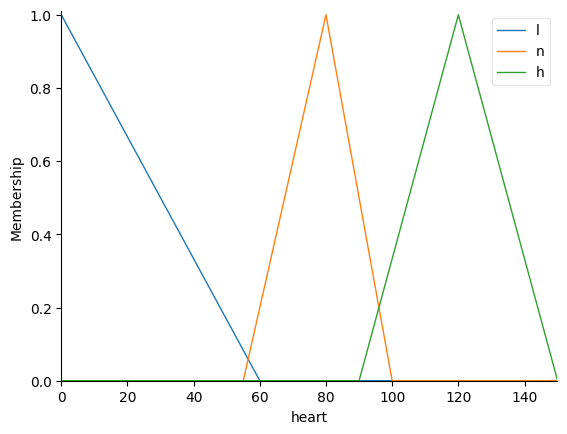

In [ ]:
heart.view()

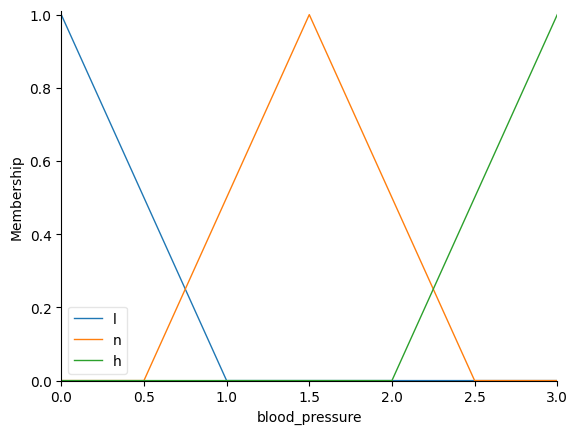

In [ ]:
blood_pressure.view()

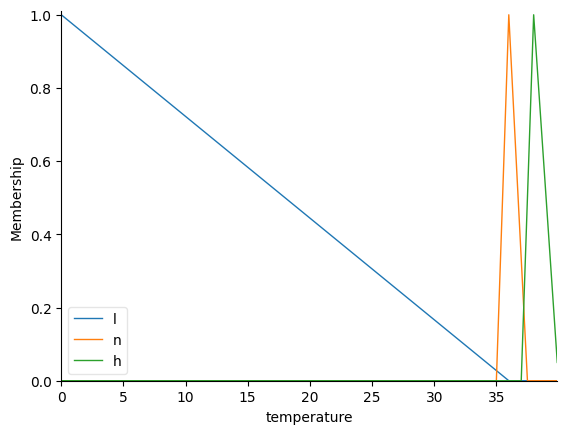

In [ ]:
temperature.view()

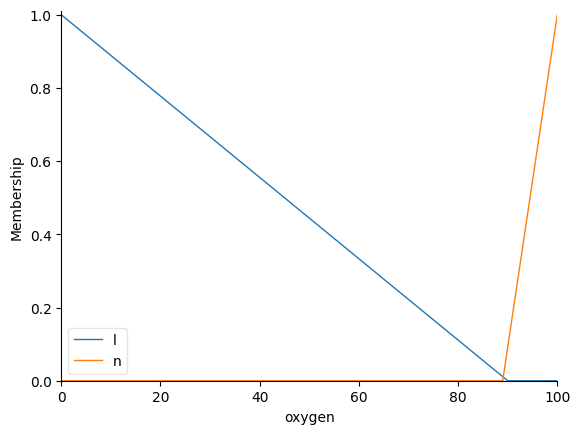

In [ ]:
oxygen.view()

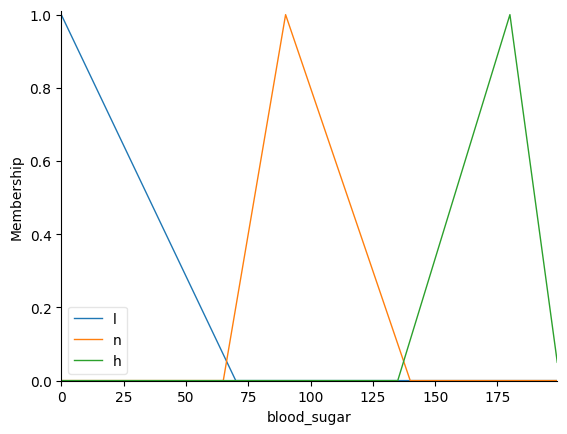

In [ ]:
blood_sugar.view()

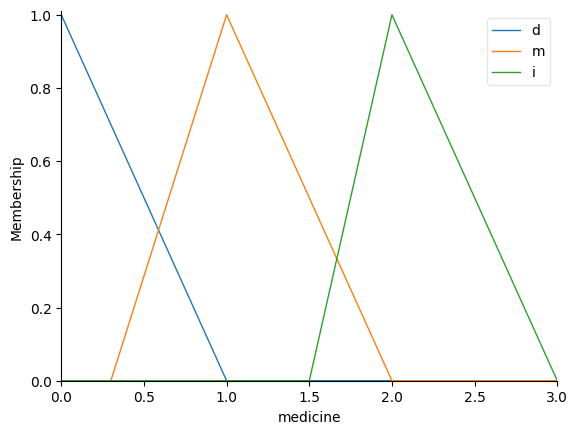

In [ ]:
medicine.view()

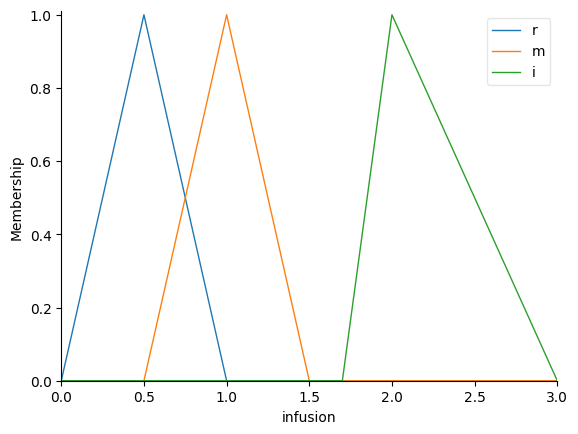

In [ ]:
infusion.view()

In [ ]:
#luật dựa trên nhịp tim và huyết áp
rule1=ctrl.Rule(heart['l']&blood_pressure['l'],(infusion['i'],medicine['i']))
rule2=ctrl.Rule(heart['h']&blood_pressure['h'],medicine['d'])
rule3=ctrl.Rule(heart['n']&blood_pressure['n'],medicine['m'])
#luật dựa trên nhiệt độ và oxy
rule4=ctrl.Rule(temperature['h']&oxygen['l'],(medicine['i'],infusion['i']))
rule5=ctrl.Rule(temperature['n']&oxygen['n'],(medicine['m'],infusion['m']))
rule6=ctrl.Rule(temperature['l']&oxygen['l'],(medicine['i'],infusion['i']))
#luật dựa trên mức đường huyết
rule7=ctrl.Rule(blood_sugar['h'],infusion['i'])
rule8=ctrl.Rule(blood_sugar['l'],infusion['r'])
rule9=ctrl.Rule(blood_sugar['n'],infusion['m'])
#luật dựa trên đường huyết
rule10=ctrl.Rule(blood_pressure['h']&heart['h'],medicine['d'])
rule11=ctrl.Rule(blood_pressure['l']&oxygen['l']&heart['l'],(infusion['i'],medicine['d']))
rule12=ctrl.Rule(temperature['h']&blood_pressure['h']&oxygen['n'],(medicine['i'],infusion['m']))

1.1355555555555559
0.9999999999999998


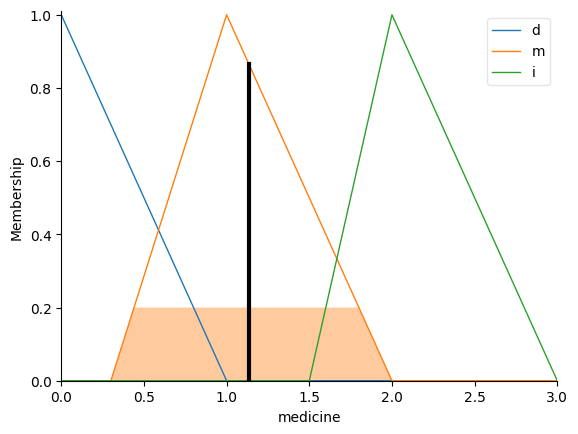

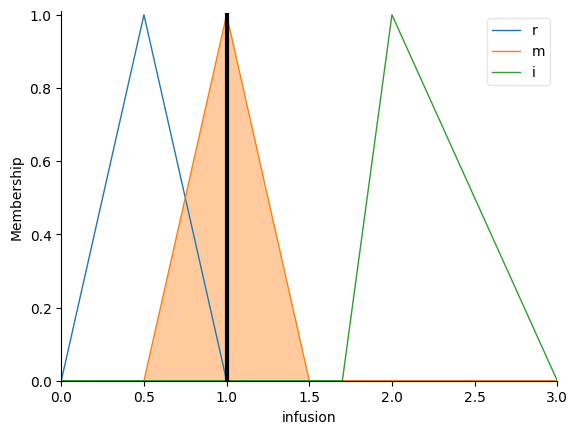

In [ ]:
health=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
sim=ctrl.ControlSystemSimulation(health)
sim.input['heart']=60
sim.input['blood_pressure']=2
sim.input['temperature']=38
sim.input['oxygen']=95
sim.input['blood_sugar']=90
sim.compute()
print(sim.output['medicine'])
print(sim.output['infusion'])
medicine.view(sim=sim)
infusion.view(sim=sim)